# Solar Measurements and Analysis
## Melbourne, Victoria, Australia 2015-2020

In [4]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
KWH_PER_MJ = 0.277778

## Load and Clean Monthly Data

In [3]:
# %ls clean\monthly

In [6]:
data = [pd.read_csv(f,encoding='utf-8',sep=',',skiprows=7,parse_dates=['dd/MM/yyyy'],dayfirst=True) for f in glob.glob('clean/monthly/Coachmans-*.csv')]
dm = pd.concat(data,axis=0,ignore_index=True)
dm.head()

,dd/MM/yyyy,kWh,kWh.1
0,2015-01-01,480.281,21.688
1,2015-01-02,500.843,20.562
2,2015-01-03,523.221,22.378
3,2015-01-04,545.977,22.756
4,2015-01-05,571.203,25.226


In [7]:
dm.columns = ['date','cumulative_kWh','daily_kWh']
dm.head()

,date,cumulative_kWh,daily_kWh
0,2015-01-01,480.281,21.688
1,2015-01-02,500.843,20.562
2,2015-01-03,523.221,22.378
3,2015-01-04,545.977,22.756
4,2015-01-05,571.203,25.226


In [8]:
dm = dm.set_index('date').sort_index()

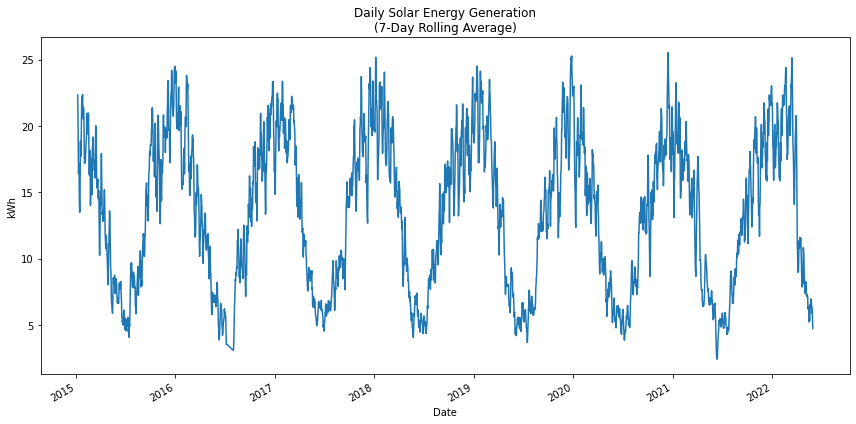

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

dm.daily_kWh.rolling(7).mean().plot(ax=ax)
ax.set(xlabel="Date",ylabel="kWh",title="Daily Solar Energy Generation\n(7-Day Rolling Average)")

plt.tight_layout()
plt.savefig("daily_solar.png")

## Load and Clean Daily Data


In [10]:
data = [pd.read_csv(f,encoding='utf-8',sep=',',skiprows=7,parse_dates=['dd/MM/yyyy hh:mm'],dayfirst=True) for f in glob.glob('clean/daily/Coachmans-*.csv')]
dd = pd.concat(data,axis=0,ignore_index=True)
dd.head()

,dd/MM/yyyy hh:mm,kWh,kW
0,2014-12-10 00:00:00,---,---
1,2014-12-10 00:05:00,---,---
2,2014-12-10 00:10:00,---,---
3,2014-12-10 00:15:00,---,---
4,2014-12-10 00:20:00,---,---


In [11]:
dd.columns = ['date','kWh','kW']
dd.head()

dd = dd.set_index('date').sort_index()

In [12]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189013 entries, 2014-12-10 00:00:00 to 2022-05-31 23:55:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   kWh     189013 non-null  object
 1   kW      189013 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB


In [13]:
# missing values are imported as a text string so convert to None.
mask = dd['kW'] == '---'

dd.loc[mask,'kW'] = None

dd.head()

,kWh,kW
date,,
2014-12-10 00:00:00,---,None
2014-12-10 00:05:00,---,None
2014-12-10 00:10:00,---,None
2014-12-10 00:15:00,---,None
2014-12-10 00:20:00,---,None


In [14]:
mask = dd['kWh'] == '---'

dd.loc[mask,'kWh'] = None

#dd.interpolate(method='backfill')
#dd[mask]

In [15]:
dd = dd.apply(pd.to_numeric,errors='ignore')
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189013 entries, 2014-12-10 00:00:00 to 2022-05-31 23:55:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   kWh     183126 non-null  float64
 1   kW      183109 non-null  float64
dtypes: float64(2)
memory usage: 4.3 MB


<AxesSubplot:xlabel='date'>

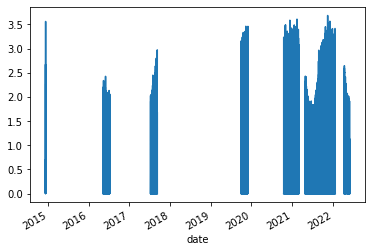

In [16]:
# identify intervals where data available
dd.kW.rolling(7).mean().plot()

In [18]:
dd['year'] = dd.index.year
dd['month'] = dd.index.month

<Figure size 864x432 with 0 Axes>

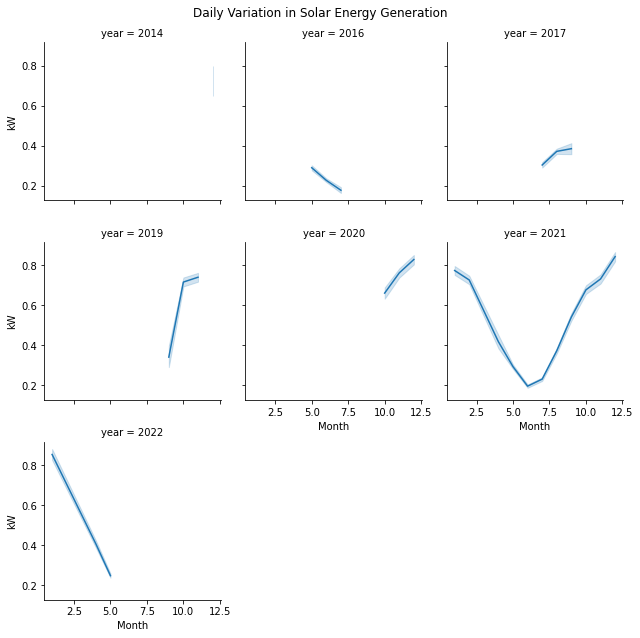

In [19]:
plt.figure(figsize=(12,6))

g = sns.FacetGrid(dd,col='year',col_wrap=3)
g.map(sns.lineplot,"month","kW")
g.set_axis_labels("Month","kW")
g.fig.suptitle('Daily Variation in Solar Energy Generation')

g.fig.tight_layout()
#plt.savefig("daily_solar_yearly_facet.png")

In [20]:
pd.DataFrame(dd.index.date).nunique()

0    659
dtype: int64

## Monthly Data Analysis

In [21]:
dm['era'] = dm.index.year*100 + dm.index.month
dm['year'] = dm.index.year
dm['month'] = dm.index.month

In [22]:
dm.head()

,cumulative_kWh,daily_kWh,era,year,month
date,,,,,
2015-01-01,480.281,21.688,201501,2015,1
2015-01-02,500.843,20.562,201501,2015,1
2015-01-03,523.221,22.378,201501,2015,1
2015-01-04,545.977,22.756,201501,2015,1
2015-01-05,571.203,25.226,201501,2015,1


d:\Users\Emanuel\DataScience\SunnyExplorer\.env\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x432 with 0 Axes>

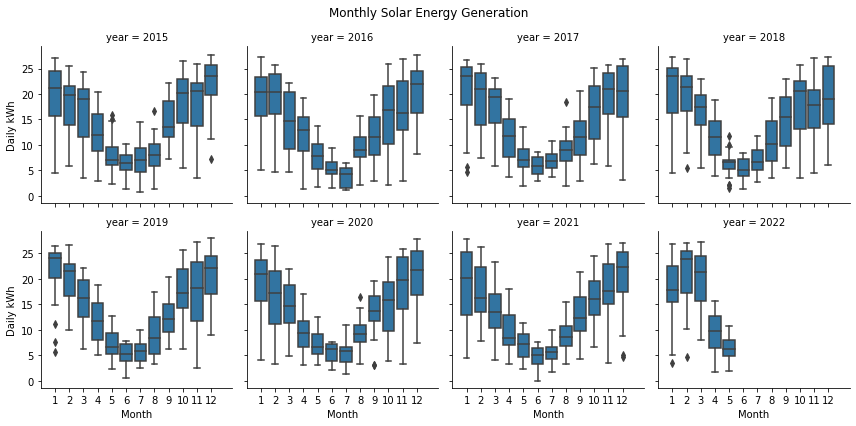

In [47]:

dt = dm.copy()
# dt['month'] += 1

plt.figure(figsize=(12,6))

# filter out incomplete year
# g = sns.FacetGrid(dt[dt.year.ne(2022)],col='year',col_wrap=3)

# all data
g = sns.FacetGrid(dt,col='year',col_wrap=4)

g.map(sns.boxplot,"month","daily_kWh")
g.set_axis_labels("Month","Daily kWh")
g.fig.suptitle('Monthly Solar Energy Generation')

g.fig.tight_layout()

# need to force full range of ticks and labels for incomplete year
g.set(xticks=range(0,12))
g.set_xticklabels(range(1,13))

g.set(xlim=(-1,12.5))
plt.savefig("monthly_solar_yearly_facet.png")

## Daily Data Analysis

<AxesSubplot:xlabel='date'>

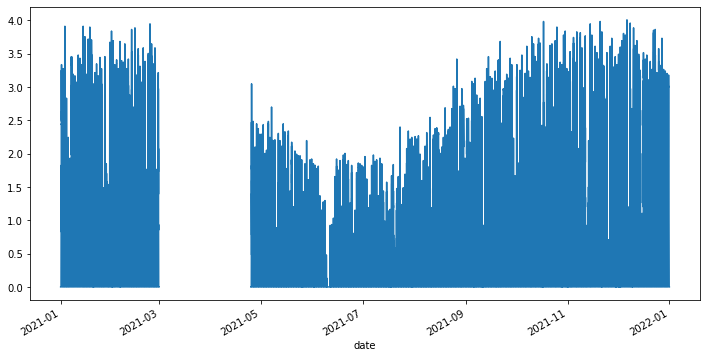

In [51]:
# data for 2020 only
plt.figure(figsize=(12,6))
dd['kW'].loc['2021'].plot()

<AxesSubplot:xlabel='month', ylabel='kW'>

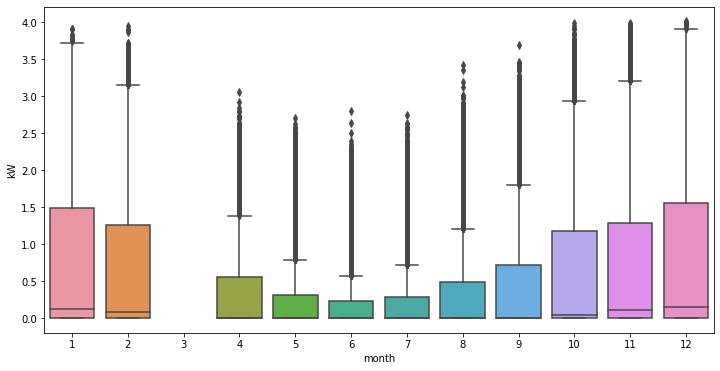

In [53]:
# all months, any year
plt.figure(figsize=(12,6))
sns.boxplot(data=dd,x='month',y='kW')

<AxesSubplot:xlabel='year', ylabel='kW'>

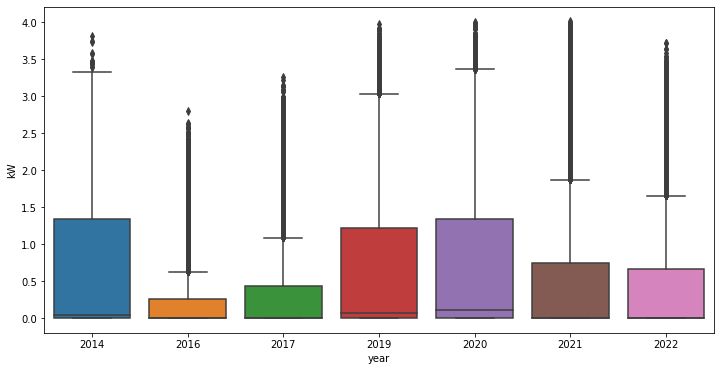

In [54]:
# daily data by year (incomplete!)
plt.figure(figsize=(12,6))
sns.boxplot(data=dd,x='year',y='kW')

In [55]:
# time-series helper columns
dd['era'] = dd.index.year*100 + dd.index.month

dd['today'] = dd.index.date

dd['hour'] = dd.index.hour

In [57]:
# filter for Dec 2020
dt =dd[dd['era']==202012]
dt.head(5)

,kWh,kW,year,month,era,today,hour
date,,,,,,,
2020-12-03 00:00:00,29511.728,NaN,2020,12,202012,2020-12-03,0
2020-12-03 00:05:00,29511.728,0.0,2020,12,202012,2020-12-03,0
2020-12-03 00:10:00,29511.728,0.0,2020,12,202012,2020-12-03,0
2020-12-03 00:15:00,29511.728,0.0,2020,12,202012,2020-12-03,0
2020-12-03 00:20:00,29511.728,0.0,2020,12,202012,2020-12-03,0


<Figure size 864x432 with 0 Axes>

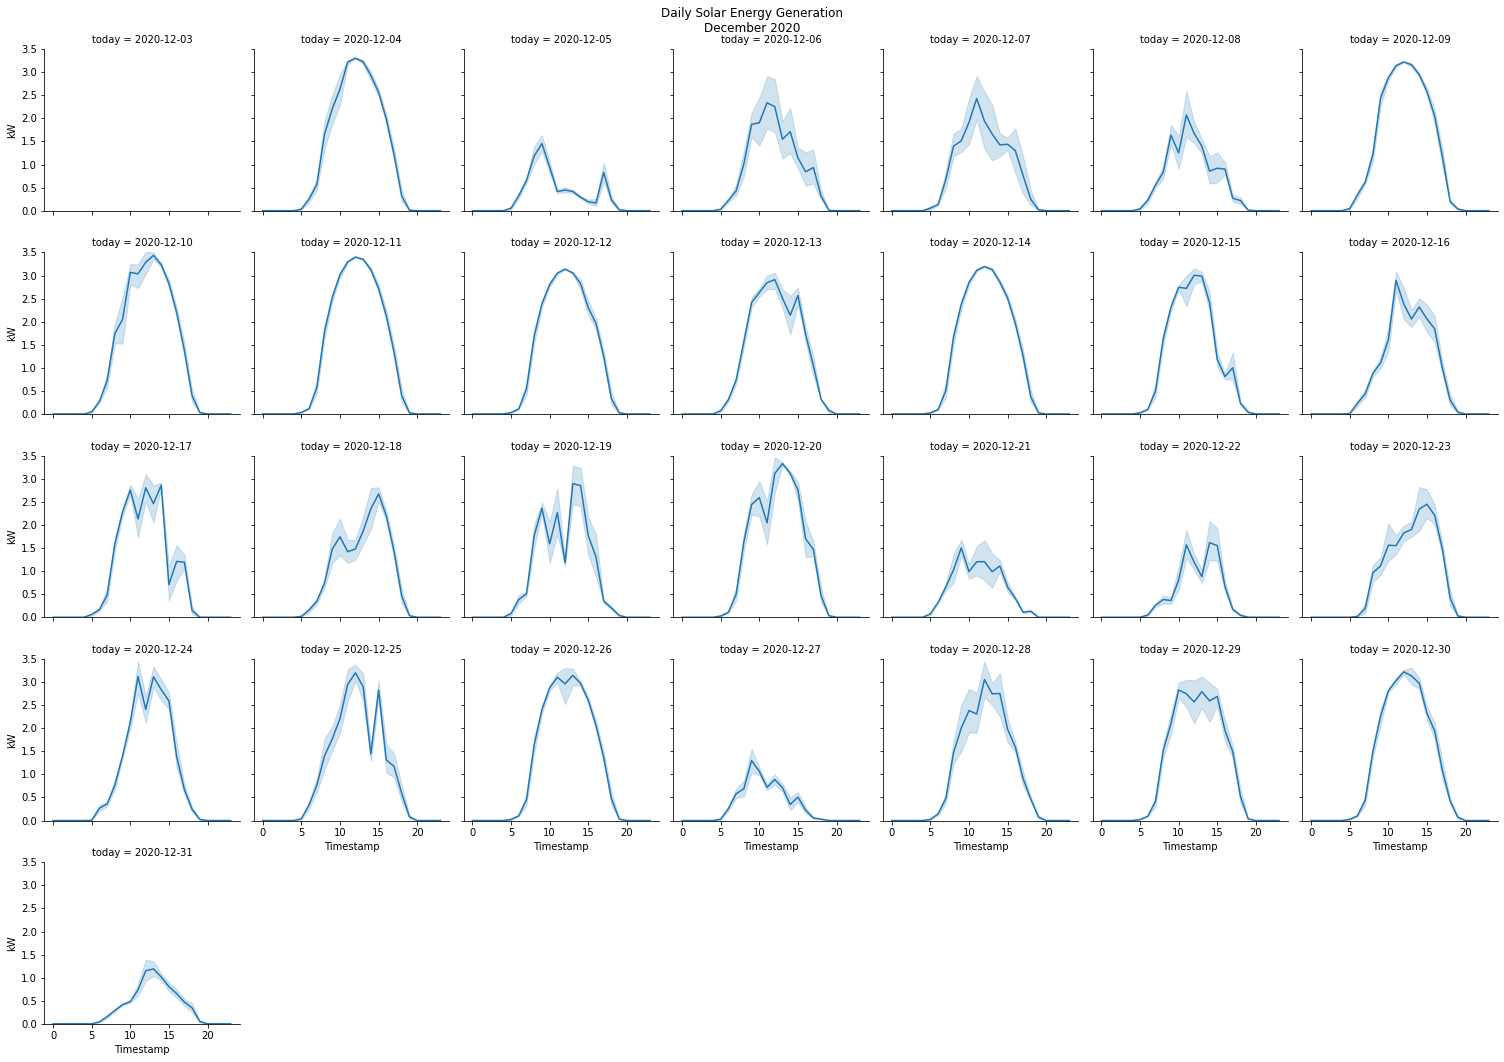

In [58]:
# hourly generation per day for selected month
plt.figure(figsize=(12,6))

g = sns.FacetGrid(dt,col="today",col_wrap=7,ylim=(0,3.5))
g.map(sns.lineplot,"hour","kW")
g.set_axis_labels("Timestamp","kW")
g.fig.suptitle('Daily Solar Energy Generation\nDecember 2020')

g.fig.tight_layout()
plt.savefig("daily_solar_dec2020_facet.png")

<AxesSubplot:xlabel='date'>

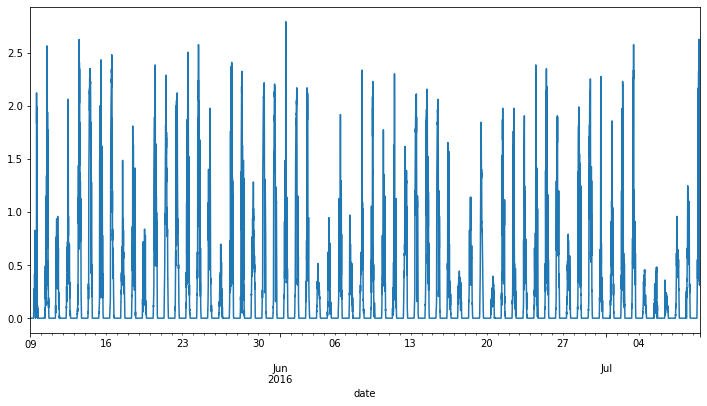

In [59]:
# Repeat the above for a winter month
plt.figure(figsize=(12,6))
dd['kW'].loc['2016'].plot()

In [60]:
# filter for Jun 2016
dt =dd[dd['era']==201606]
dt.head()

,kWh,kW,year,month,era,today,hour
date,,,,,,,
2016-06-01 00:00:00,7741.568,0.0,2016,6,201606,2016-06-01,0
2016-06-01 00:05:00,7741.568,0.0,2016,6,201606,2016-06-01,0
2016-06-01 00:10:00,7741.568,0.0,2016,6,201606,2016-06-01,0
2016-06-01 00:15:00,7741.568,0.0,2016,6,201606,2016-06-01,0
2016-06-01 00:20:00,7741.568,0.0,2016,6,201606,2016-06-01,0


<Figure size 864x432 with 0 Axes>

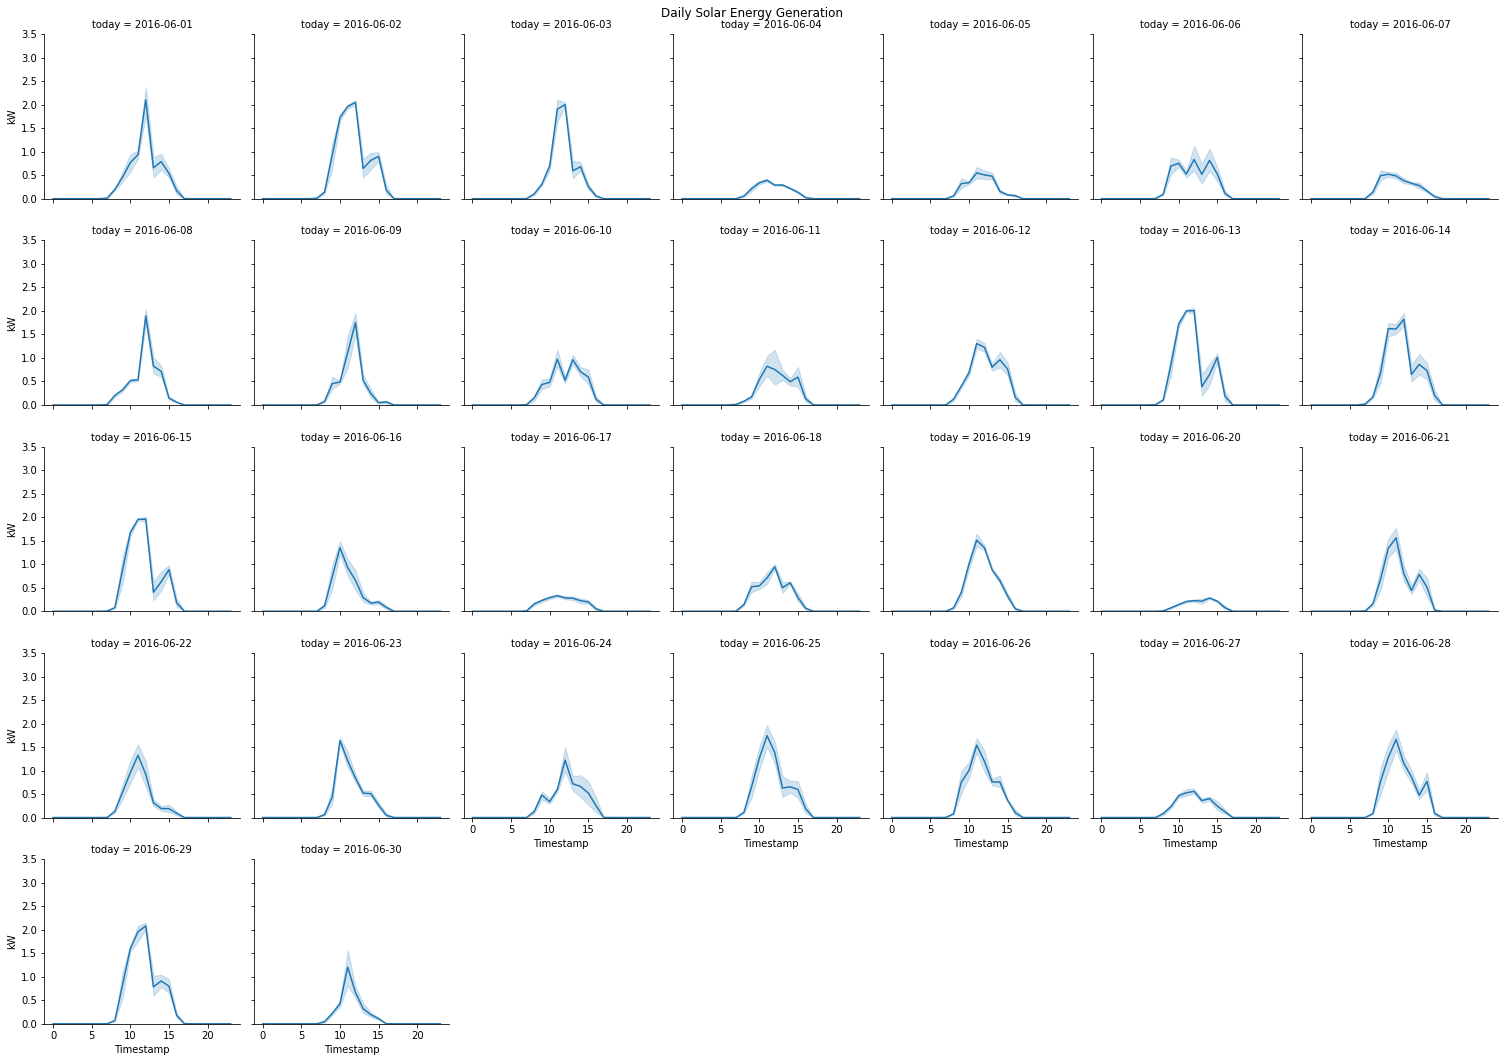

In [61]:
# hourly generation per day for selected month
plt.figure(figsize=(12,6))

g = sns.FacetGrid(dt,col="today",col_wrap=7,ylim=(0,3.5))
g.map(sns.lineplot,"hour","kW")
g.set_axis_labels("Timestamp","kW")
g.fig.suptitle('Daily Solar Energy Generation')

g.fig.tight_layout()
plt.savefig("daily_solar_jun2016_facet.png")

## Sun Position

Currently done for single month.  Need to expand for all months.

In [ ]:
# load and merge BOM solar measurements
#!pip list

In [30]:
import pysolar

In [31]:
from pysolar.solar import *
import datetime

# BOM Mitchum station 86074
lat = -37.82
long = 145.19

In [32]:
from dateutil import tz
MELB = tz.gettz('Australia/Melbourne')
MELB

tzfile('Australia/Melbourne')

In [33]:
# pysolar requires explict timezone
#date = datetime.datetime.now(MELB)
#az = get_azimuth(lat, long, date)
#alt = get_altitude(lat, long, date)
#rad = radiation.get_radiation_direct(date,alt) #Wm-2
#print(date,az,alt,rad)

# date = datetime.datetime(2007, 2, 18, 15, 13, 1, 130320, tzinfo=datetime.timezone.utc)
# print(get_altitude(42.206, -71.382, date))

In [34]:
# Using daily data, calculate sun position (az, alt) and incident radiation

di = []
for timestamp in dd.index:

    date = timestamp.to_pydatetime()
    date = date.replace(tzinfo=MELB)

    az = get_azimuth(lat, long, date)
    alt = get_altitude(lat, long, date)
    rad = radiation.get_radiation_direct(date,alt) #Wm-2
    # print(timestamp,az,alt,rad)
    
    di.append([timestamp,az,alt,rad])
    
# Calculate off-axis incidence

d:\users\emanuel\datascience\sunnyexplorer\env\lib\site-packages\pysolar\radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
d:\users\emanuel\datascience\sunnyexplorer\env\lib\site-packages\pysolar\radiation.py:50: RuntimeWarning: invalid value encountered in multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


In [35]:
# convert list of lists to dataframe
di = pd.DataFrame(di)
di.head()

,0,1,2,3
0,2014-12-10 00:00:00,198.534709,-27.057562,0.0
1,2014-12-10 00:05:00,197.285465,-27.360798,0.0
2,2014-12-10 00:10:00,196.026799,-27.643405,0.0
3,2014-12-10 00:15:00,194.759253,-27.905095,0.0
4,2014-12-10 00:20:00,193.483403,-28.145599,0.0


In [36]:
# fix columns and index
di.columns = ['date','az','alt','W_per_sqm']
di = di.set_index('date').sort_index()
di.head()

,az,alt,W_per_sqm
date,,,
2014-12-10 00:00:00,198.534709,-27.057562,0.0
2014-12-10 00:05:00,197.285465,-27.360798,0.0
2014-12-10 00:10:00,196.026799,-27.643405,0.0
2014-12-10 00:15:00,194.759253,-27.905095,0.0
2014-12-10 00:20:00,193.483403,-28.145599,0.0


In [37]:
di.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84176 entries, 2014-12-10 00:00:00 to 2021-01-31 23:55:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   az         84176 non-null  float64
 1   alt        84176 non-null  float64
 2   W_per_sqm  84172 non-null  float64
dtypes: float64(3)
memory usage: 2.6 MB


<AxesSubplot:xlabel='date'>

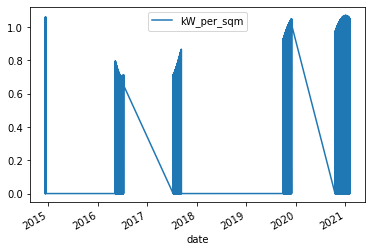

In [38]:
di['kW_per_sqm'] = di['W_per_sqm'] / 1000.0
di.plot(y='kW_per_sqm')

In [39]:
# module tilt
roof_pitch_deg = 22.5

# horizontal component, i.e radiation perpendicular to Earth's surface
di['kW_per_sqm_H'] = di['kW_per_sqm'] * np.sin(np.deg2rad(di['alt']))

# perpendicular to (tilted) module
di['kW_per_sqm_M'] = di['kW_per_sqm'] * np.sin(np.deg2rad(di['alt'] + roof_pitch_deg))

# off-axis (ie. from North) module component
di['kW_per_sqm_Z'] = di['kW_per_sqm_M'] * np.cos(np.deg2rad(di['az']))
di.head()

,az,alt,W_per_sqm,kW_per_sqm,kW_per_sqm_H,kW_per_sqm_M,kW_per_sqm_Z
date,,,,,,,
2014-12-10 00:00:00,198.534709,-27.057562,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:05:00,197.285465,-27.360798,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:10:00,196.026799,-27.643405,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:15:00,194.759253,-27.905095,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:20:00,193.483403,-28.145599,0.0,0.0,-0.0,-0.0,0.0


In [40]:
di.loc[di['kW_per_sqm_Z'] <0, 'kW_per_sqm_Z'] = 0

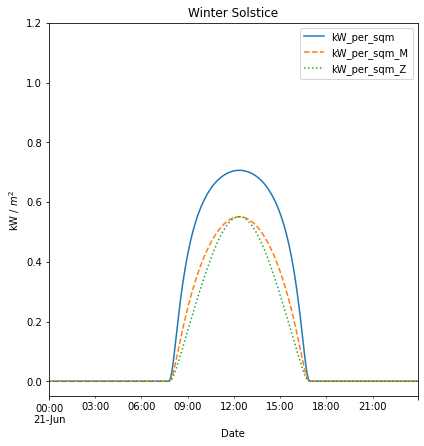

In [41]:
# winter

#fig = plt.figure(figsize=(6,6.3))

style = ["-","--",":"]

# di.loc['2016-06-21'].plot(y=['kW_per_sqm','kW_per_sqm_H','kW_per_sqm_M','kW_per_sqm_Z'],ylim=(-0.05,1.2))
di.loc['2016-06-21'].plot(y=['kW_per_sqm','kW_per_sqm_M','kW_per_sqm_Z'],
                          ylim=(-0.05,1.2),
                          xlabel="Date",
                          ylabel="kW / $m^2$",
                          title="Winter Solstice",
                         style=style,
                         figsize=(6,6.3))


#plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig("irradiance_winter.png")

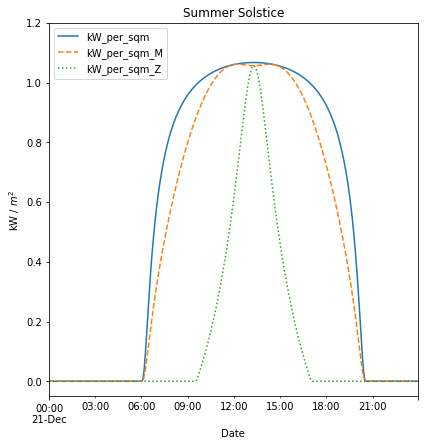

In [42]:
# summer

# plt.figure(figsize=(6,6.3))

style = ["-","--",":"]

#di.loc['2020-12-21'].plot(y=['kW_per_sqm','kW_per_sqm_H','kW_per_sqm_M','kW_per_sqm_Z'],ylim=(-0.05,1.2))
di.loc['2020-12-21'].plot(y=['kW_per_sqm','kW_per_sqm_M','kW_per_sqm_Z'],
                          ylim=(-0.05,1.2),
                          xlabel="Date",
                          ylabel="kW / $m^2$",
                          title="Summer Solstice",
                          style=style,
                          figsize=(6,6.3))

#plt.subplots_adjust(bottom=0.15)
plt.tight_layout()

plt.savefig("irradiance_summer.png")
plt.show()

In [43]:
print(di.index.date)

[datetime.date(2014, 12, 10) datetime.date(2014, 12, 10)
 datetime.date(2014, 12, 10) ... datetime.date(2021, 1, 31)
 datetime.date(2021, 1, 31) datetime.date(2021, 1, 31)]


In [83]:
# alternate integration using decimal hours
from scipy.integrate import simps

dtmp['hours'] = dtmp.index.hour + dtmp.index.minute / 60
simps(dtmp['kW_per_sqm_Z'],dtmp['hours'])


3.5096571656576447

In [82]:
dtmp.index

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='date', length=288)

In [84]:
dtmp = di.loc['2020-12-21']
area_summer_solstice = np.trapz(dtmp['kW_per_sqm_Z'],dx=1/12)
area_summer_solstice

3.509657165657645

In [85]:
# alternate integration using decimal hours
from scipy.integrate import simps

dtmp['hours'] = dtmp.index.hour + dtmp.index.minute / 60
simps(dtmp['kW_per_sqm_Z'],dtmp['hours'])

3.5096571656576447

In [86]:
dtmp = di.loc['2016-06-21']
area_winter_solstice = np.trapz(dtmp['kW_per_sqm_Z'],dx=1/12)
area_winter_solstice

2.913140347351751

In [67]:
100*(area_summer_solstice - area_winter_solstice) / area_winter_solstice

20.476762091059896

In [45]:
np.unique(di.index.date)

array([datetime.date(2014, 12, 10), datetime.date(2014, 12, 11),
       datetime.date(2014, 12, 12), datetime.date(2016, 5, 9),
       datetime.date(2016, 5, 10), datetime.date(2016, 5, 11),
       datetime.date(2016, 5, 12), datetime.date(2016, 5, 13),
       datetime.date(2016, 5, 14), datetime.date(2016, 5, 15),
       datetime.date(2016, 5, 16), datetime.date(2016, 5, 17),
       datetime.date(2016, 5, 18), datetime.date(2016, 5, 19),
       datetime.date(2016, 5, 20), datetime.date(2016, 5, 21),
       datetime.date(2016, 5, 22), datetime.date(2016, 5, 23),
       datetime.date(2016, 5, 24), datetime.date(2016, 5, 25),
       datetime.date(2016, 5, 26), datetime.date(2016, 5, 27),
       datetime.date(2016, 5, 28), datetime.date(2016, 5, 29),
       datetime.date(2016, 5, 30), datetime.date(2016, 5, 31),
       datetime.date(2016, 6, 1), datetime.date(2016, 6, 2),
       datetime.date(2016, 6, 3), datetime.date(2016, 6, 4),
       datetime.date(2016, 6, 5), datetime.date(2016, 6, 

In [46]:
# compute area (insolation) for each day, perpendicular to module
da = []

for mydate in np.unique(di.index.date):
    
    # data on given day
    dtmp = di[di.index.date==mydate]
    
    # insolation
    # 5 min intervals = 1/12 hour =0.083 hr
    area = np.trapz(dtmp['kW_per_sqm_Z'],dx=0.083)
    
    # filter daily data by position above horizon
    ds = dtmp[dtmp['alt'] > 0]
    
    if len(ds) > 0:
        sunrise = ds.index[0]
        sunset = ds.index[-1]
        daylight_hours = (sunset - sunrise).seconds / 3600.0

        da.append([mydate,sunrise,sunset,daylight_hours,area])



In [47]:
da = pd.DataFrame(da).set_index(0)
da = da.rename(columns={1:'sunrise',2:'sunset',3:'daylight_hours',4:'kWh_per_sqm_per_day'})
da.index.rename('date',inplace=True)
da.index = pd.to_datetime(da.index)
da.head()

,sunrise,sunset,daylight_hours,kWh_per_sqm_per_day
date,,,,
2014-12-10,2014-12-10 05:55:00,2014-12-10 20:30:00,14.583333,3.557362
2014-12-11,2014-12-11 05:55:00,2014-12-11 20:30:00,14.583333,3.546374
2014-12-12,2014-12-12 05:55:00,2014-12-12 20:30:00,14.583333,3.536441
2016-05-09,2016-05-09 07:10:00,2016-05-09 17:20:00,10.166667,3.716472
2016-05-10,2016-05-10 07:10:00,2016-05-10 17:20:00,10.166667,3.684979


In [87]:
print(da.loc['2016.06.21'])

sunrise                2016-06-21 07:40:00
sunset                 2016-06-21 17:05:00
daylight_hours                    9.416667
kWh_per_sqm_per_day               2.901488
kWh_per_day                      69.055409
Name: 2016-06-21 00:00:00, dtype: object


In [88]:
print(da.loc['2020.12.21'])

sunrise                2020-12-21 06:00:00
sunset                 2020-12-21 20:35:00
daylight_hours                   14.583333
kWh_per_sqm_per_day               3.495619
kWh_per_day                      83.195721
Name: 2020-12-21 00:00:00, dtype: object


In [89]:
# summer vs winter solstice hours
(14.6 - 9.4) / 9.4

0.553191489361702

In [ ]:
# !pip install sklearn

In [ ]:
# https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t
# from sklearn.metrics import auc
# auc(np.array(dtmp.index),np.array(dtmp['kWm-2']))

In [48]:
da.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2014-12-10 to 2021-01-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sunrise              293 non-null    datetime64[ns]
 1   sunset               293 non-null    datetime64[ns]
 2   daylight_hours       293 non-null    float64       
 3   kWh_per_sqm_per_day  289 non-null    float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 11.4 KB


<AxesSubplot:xlabel='date'>

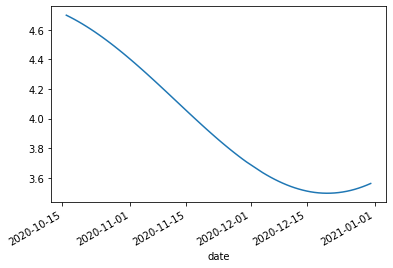

In [49]:
# radiation: should peak at solstice??
da.loc[da.index.year==2020,'kWh_per_sqm_per_day'].plot()

In [50]:
# energy generation over panel area
panel_area_m2 = 1.7
panel_count = 14
roof_pitch_deg = 22.5
da['kWh_per_day'] = da['kWh_per_sqm_per_day'] * panel_area_m2 * panel_count

In [51]:
# inter-day comparison
dz = dm[dm['era']==202012]
dz = dz.merge(da,how='inner',on='date')

In [58]:
dz.describe()

,cumulative_kWh,daily_kWh,era,year,month,daylight_hours,kWh_per_sqm_per_day,kWh_per_day,Eff
count,28.000000,28.000000,28.0,28.0,28.0,28.000000,28.000000,28.000000,28.000000
mean,29833.007607,19.927429,202012.0,2020.0,12.0,14.613095,3.534943,84.131638,0.236956
std,168.285884,6.533972,0.0,0.0,0.0,0.060918,0.039769,0.946503,0.077674
min,29564.515000,7.407000,202012.0,2020.0,12.0,14.500000,3.495234,83.186568,0.088376
25%,29693.219500,16.842750,202012.0,2020.0,12.0,14.583333,3.502814,83.366976,0.196965
50%,29846.395000,21.517500,202012.0,2020.0,12.0,14.625000,3.522712,83.840535,0.257808
75%,29965.565500,25.391750,202012.0,2020.0,12.0,14.666667,3.554449,84.595874,0.302413
max,30096.350000,27.842000,202012.0,2020.0,12.0,14.666667,3.634909,86.510824,0.330306


In [52]:
# observed to theoretical efficiency
dz['Eff'] = dz['daily_kWh'] / dz['kWh_per_day']
dz.loc[dz['kWh_per_day'] < 0.001,'Eff'] = 0

<AxesSubplot:xlabel='date'>

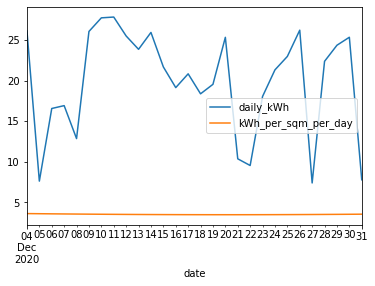

In [53]:
dz[['daily_kWh','kWh_per_sqm_per_day']].plot()

In [54]:
# intra-day efficiency: inner join between observed daily data and computed irradiance
dy = dd.merge(di,how='inner',on='date')

In [55]:
# watch for dividing by small number
dy['kW_calc'] = dy['kW_per_sqm_Z'] * panel_count * panel_area_m2
dy['Eff'] = dy['kW'] / dy['kW_calc']
dy.loc[dy['kW_calc'] < 0.01,'Eff'] = 0
dy[dy['alt']>0].head()

,kWh,kW,year,month,era,today,hour,az,alt,W_per_sqm,kW_per_sqm,kW_per_sqm_H,kW_per_sqm_M,kW_per_sqm_Z,kW_calc,Eff
date,,,,,,,,,,,,,,,,
2014-12-10 05:55:00,NaN,NaN,2014,12,201412,2014-12-10,5,119.496205,0.435636,0.000008,7.521514e-09,5.718764e-11,2.931110e-09,0.0,0.0,0.0
2014-12-10 06:00:00,NaN,NaN,2014,12,201412,2014-12-10,6,118.733411,1.191059,1.217148,1.217148e-03,2.530013e-05,4.890561e-04,0.0,0.0,0.0
2014-12-10 06:05:00,NaN,NaN,2014,12,201412,2014-12-10,6,117.977627,1.983948,19.309103,1.930910e-02,6.684718e-04,8.002432e-03,0.0,0.0,0.0
2014-12-10 06:10:00,NaN,NaN,2014,12,201412,2014-12-10,6,117.228560,2.804892,65.080871,6.508087e-02,3.184736e-03,2.781785e-02,0.0,0.0,0.0
2014-12-10 06:15:00,NaN,NaN,2014,12,201412,2014-12-10,6,116.485918,3.646344,128.135246,1.281352e-01,8.149115e-03,5.646477e-02,0.0,0.0,0.0


In [56]:
dy.describe()

,kWh,kW,year,month,era,hour,az,alt,W_per_sqm,kW_per_sqm,kW_per_sqm_H,kW_per_sqm_M,kW_per_sqm_Z,kW_calc,Eff
count,84094.000000,84087.000000,84176.000000,84176.000000,84176.000000,84176.000000,84176.000000,84176.000000,84172.000000,84172.000000,84172.000000,84172.000000,84172.000000,84172.000000,84172.000000
mean,20168.720685,0.559369,2018.364914,8.100741,201844.592140,11.478272,179.756545,1.712197,376.538362,0.376538,0.228875,0.315952,0.159764,3.802383,0.143339
std,9083.034009,0.909559,1.805598,3.258767,180.968131,6.919616,98.906454,37.671108,423.976056,0.423976,0.320445,0.386021,0.271252,6.455789,1.588550
min,0.000000,0.000000,2014.000000,1.000000,201412.000000,0.000000,0.011888,-75.614948,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
25%,12958.689250,0.000000,2017.000000,6.000000,201707.000000,5.000000,91.621575,-27.919600,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
50%,24043.625000,0.000000,2019.000000,9.000000,201910.000000,11.000000,179.325973,1.624343,2.398388,0.002398,0.000072,0.000975,0.000000,0.000000,0.000000
75%,29223.065000,0.792000,2020.000000,11.000000,202011.000000,17.000000,268.033789,29.849670,807.911639,0.807912,0.394758,0.631677,0.247960,5.901436,0.076380
max,30672.352000,3.996000,2021.000000,12.000000,202101.000000,23.000000,359.997949,75.610688,1069.305143,1.069305,1.034782,1.064007,1.060765,25.246205,156.822630


In [110]:
# not a good measure: dividing by small numbers at sunrise and sunset
ds = dy.loc['2020-12-14',['kW','kW_calc']]

In [113]:
x

array([[29749.556, 0.0, 2020, ..., 0.0, 0.0, 0.0],
       [29749.556, 0.0, 2020, ..., 0.0, 0.0, 0.0],
       [29749.556, 0.0, 2020, ..., 0.0, 0.0, 0.0],
       ...,
       [29775.504, 0.0, 2020, ..., 0.0, 0.0, 0.0],
       [29775.504, 0.0, 2020, ..., 0.0, 0.0, 0.0],
       [29775.504, 0.0, 2020, ..., 0.0, 0.0, 0.0]], dtype=object)

In [114]:
from sklearn import preprocessing

x = ds.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ds = pd.DataFrame(x_scaled)

<AxesSubplot:>

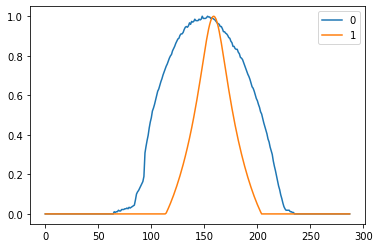

In [115]:
# observed vs theoretical, normalised to one.
ds.plot()

In [142]:
from mpl_toolkits import mplot3d
from matplotlib import animation

In [150]:
di.head()

,az,alt,W_per_sqm,kW_per_sqm,kW_per_sqm_H,kW_per_sqm_M,kW_per_sqm_Z
date,,,,,,,
2014-12-10 00:00:00,198.534709,-27.057562,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:05:00,197.285465,-27.360798,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:10:00,196.026799,-27.643405,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:15:00,194.759253,-27.905095,0.0,0.0,-0.0,-0.0,0.0
2014-12-10 00:20:00,193.483403,-28.145599,0.0,0.0,-0.0,-0.0,0.0


In [151]:
mydate = '2020-12-21'
X = dy.loc[mydate,'az']
Y = dy.loc[mydate,'alt']
Z = dy.loc[mydate,'kW']

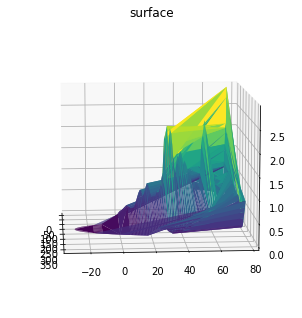

In [152]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

def init():
    ax.plot_trisurf(X, Y, Z, cmap='viridis',linewidth=0.2)
    ax.set_title('surface');
    return fig

def animate(i):
    ax.view_init(elev=10, azim=i*4)
    return fig

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50)

ani.save('foo.mp4',writer='ffmpeg',fps=1000/50,repeat=True)

In [146]:
ani

In [136]:
X.describe

<bound method NDFrame.describe of date
2020-12-21 00:00:00    199.693516
2020-12-21 00:05:00    198.466447
2020-12-21 00:10:00    197.229664
2020-12-21 00:15:00    195.983658
2020-12-21 00:20:00    194.728956
                          ...    
2020-12-21 23:35:00    205.783259
2020-12-21 23:40:00    204.612086
2020-12-21 23:45:00    203.429262
2020-12-21 23:50:00    202.235092
2020-12-21 23:55:00    201.029917
Name: az, Length: 288, dtype: float64>

## BOM Observations

In [116]:
# official monthly averages for solar exposure
bom_avg_monthly = pd.read_csv('data/bom/bom_solar_exp_kwh_per_sqm.csv')
bom_avg_monthly.info()

# move year to index?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6 non-null      int64  
 1   Jan     6 non-null      float64
 2   Feb     6 non-null      float64
 3   Mar     6 non-null      float64
 4   Apr     6 non-null      float64
 5   May     6 non-null      float64
 6   Jun     6 non-null      float64
 7   Jul     6 non-null      float64
 8   Aug     6 non-null      float64
 9   Sep     6 non-null      float64
 10  Oct     6 non-null      float64
 11  Nov     6 non-null      float64
 12  Dec     6 non-null      float64
 13  Annual  6 non-null      float64
dtypes: float64(13), int64(1)
memory usage: 800.0 bytes


In [117]:
# official daily solar exposure
bom_sol_exp_daily = pd.read_csv('data/bom/IDCJAC0016_086074_1800_Data.csv',parse_dates=[['Year','Month','Day']])
bom_sol_exp_daily.drop(columns=['Product code','Bureau of Meteorology station number'],inplace=True)
bom_sol_exp_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11357 entries, 0 to 11356
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Year_Month_Day                        11357 non-null  datetime64[ns]
 1   Daily global solar exposure (MJ/m*m)  10877 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 177.6 KB


In [118]:
bom_sol_exp_daily = bom_sol_exp_daily.set_index('Year_Month_Day').sort_index()

In [119]:
bom_sol_exp_daily.fillna(method='ffill',inplace=True)

In [120]:
bom_sol_exp_daily.index.rename('date',inplace=True)

In [121]:
bom_sol_exp_daily.head()

,Daily global solar exposure (MJ/m*m)
date,
1990-01-01,32.7
1990-01-02,31.2
1990-01-03,31.2
1990-01-04,20.4
1990-01-05,28.4


In [122]:
# simplify MJ/m^2 column name
bom_sol_exp_daily.columns = ['sol_exp']

# inplace conversion from MJ/m^2 to kWh/m^2
bom_sol_exp_daily['sol_exp'] = bom_sol_exp_daily['sol_exp'] * KWH_PER_MJ

bom_sol_exp_daily.head()

,sol_exp
date,
1990-01-01,9.083341
1990-01-02,8.666674
1990-01-03,8.666674
1990-01-04,5.666671
1990-01-05,7.888895


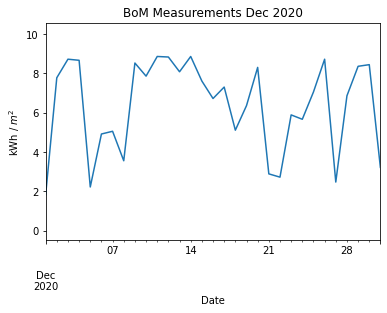

In [123]:
bom_sol_exp_daily['sol_exp'].plot(xlim=('2020-12-01','2020-12-31'),
                                 title="BoM Measurements Dec 2020",
                                 ylabel="kWh / $m^2$",
                                 xlabel="Date")

plt.savefig("bom_dec20.png")

In [124]:
bom_sol_exp_monthly = bom_sol_exp_daily.resample('M').mean()
bom_sol_exp_monthly.tail()

,sol_exp
date,
2020-10-31,4.326168
2020-11-30,5.853708
2020-12-31,6.369181
2021-01-31,5.892478
2021-02-28,5.064819


<AxesSubplot:xlabel='date'>

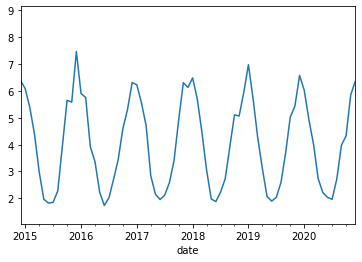

In [125]:
bom_sol_exp_monthly['sol_exp'].plot(xlim=('2014-12-01','2020-12-31'))